<a href="https://colab.research.google.com/github/Alexandre0702/TP-Analyse-multidimentionnelle/blob/Alexandre/exam_V3DMI5_2020_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Chaillou Alexandre 
Notebook disponible sur GitHub : https://github.com/Alexandre0702/TP-Analyse-multidimentionnelle/blob/Alexandre/exam_V3DMI5_2020_ipynb_txt.ipynb

# Sujet de l'examen Final 2020 du Cours V3DMI5

---
Ce notebook contient votre compte-rendu pour l'examen. Il s'agit d'un travail __individuel__ que vous devez finir dans le temps imparti. Vous devez impérativement sauvegarder votre travail sous la forme d'un fichier  au format *.ipynb (Menu: Fichier / Télécharger le fichier .ipynb) et le téléverser sur Moodle avant l'heure limite de 10h45 (prévoir quelques minutes car l'outil Moodle se bloque automatiquement à 10h45).

 <img src="https://lca-icsi.com/wp-content/uploads/2016/04/warning.png" alt="attention" height="42" width="42" align="top"> 
 
 __Toute communication entre vous ou des extérieurs durant la durée de ce TP est interdite.__

Vous avez par contre le droit
* de vous aider de forums ou de sites quelconques internet.
* De copier-coller du code. Dans ce cas, vous devez indiquer la source du programme de manière correcte (et comme pour le reste: commenter en français chaque ligne).
* De me demander de l'aide sur Discord en cas de blocage majeur.


Les critères de notation sont:
* La qualité des commentaires détaillés et en français de __chaque ligne__ du programme.
* Un code bien structuré et lisible.
* L'exactitude des résultats
---

# Travail demandé

1. Récupérer sous forme de tableau `numpy` les données du fichier http://biostatisticien.eu/Nobel_avecMath.csv qui contient le nombre de prix nobel et la taille de la population (en millions d'habitants) pour plusieurs pays ou grandes régions du monde. Utiliser la fonction `read_csv` de la librairie `pandas` et stocker le tableau dans un objet nommé `data_nobel`. (1 point)


In [61]:
#Importation de la librairie nécessaire
import pandas as pd
import numpy as np
#Importation à l'aide de l'url des données, en ajoutant le séparateur présent et le type d'encodage
data_nobel = pd.read_csv('http://biostatisticien.eu/Nobel_avecMath.csv', encoding='latin-1', sep=';')

2. Afficher les premières lignes de ce fichier. (1 point)

In [62]:
# Affichage des 5 premières lignes
data_nobel.head()

,Unnamed: 0,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
0,Allemagne,24,1,8,18,5,24,1,83.02
1,Canada,4,3,2,4,1,4,1,37.59
2,France,8,3,11,12,10,9,11,66.99
3,GB,23,6,7,26,11,20,4,66.65
4,Italie,1,1,6,5,1,5,1,60.36


3. Renommer la première colonne avec l'intitulé "Pays ou région", puis choisir cette colonne comme index et afficher les premieres lignes de la table ainsi modifiée. (1 point)

In [63]:
# On renomme d'abord l'intitulé de la première avec 'Pays ou région'
data_nobel = data_nobel.rename(columns={data_nobel.columns[0]:'Pays ou région'})
# On réindexe avec ce nouvel intitulé et affichage des premières lignes
data_nobel = data_nobel.set_index('Pays ou région')
data_nobel.head()

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
Pays ou région,,,,,,,,
Allemagne,24,1,8,18,5,24,1,83.02
Canada,4,3,2,4,1,4,1,37.59
France,8,3,11,12,10,9,11,66.99
GB,23,6,7,26,11,20,4,66.65
Italie,1,1,6,5,1,5,1,60.36


4. Afficher une description numerique de toutes les variables comme vu dans le cours (1 point)

In [26]:
# Utilisation de la fonction describe pour afficher par variable les informations statistiques classiques
data_nobel.describe()

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,22.461538,10.384615,12.384615,26.692308,11.615385,26.538462,7.846154,644.191308
std,28.212336,16.835174,20.540766,35.541958,14.174734,32.141913,9.281219,1215.280236
min,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,37.590000
25%,4.000000,1.000000,5.000000,4.000000,1.000000,5.000000,1.000000,66.650000
50%,8.000000,3.000000,7.000000,9.000000,8.000000,11.000000,4.000000,126.500000
75%,24.000000,6.000000,10.000000,26.000000,16.000000,24.000000,11.000000,741.400000
max,94.000000,47.000000,79.000000,110.000000,51.000000,103.000000,34.000000,4463.000000


5. Afficher la liste des pays et régions. (1 point)

In [30]:
# On ressort l'ensemble des index du dataframe qui sont ensuite stockées dans une liste
data_nobel.index.tolist()

['Allemagne',
 'Canada',
 'France',
 'GB',
 'Italie',
 'Japon',
 'Russie',
 'USA',
 'Afrique',
 'Amérique',
 'Asie',
 'Europe',
 'Océanie']

6. En utilisant la fonction `at`, extraire et afficher le nombre de prix nobel de physique en Allemagne. (1 point)

In [46]:
# Extraction de la donnée avec la fonction at
nb_prixphys_all = data_nobel.at['Allemagne','Physique']
# Affichage dans une chaîne de caratères avec la fonction format
print('L\'Allemagne accumule {} prix nobels de physique.'.format(nb_prixphys_all))

L'Allemagne accumule 24 prix nobels de physique.


7. Extraire et afficher la sous-table du nombre de prix nobel en sciences (Chimie, Physique et Mathématiques) pour les seuls quatre pays européens (sans la région `Europe`). Utiliser la fonction `loc`. (1 point)

In [41]:
# Je crée d'abord les listes de colonnes et index à extraire
pays = ['Allemagne', 'France', 'GB', 'Italie']
domaine = ['Chimie', 'Physique', 'Mathématiques']
# Puis je l'insère dans la fonction loc
data_nobel.loc[pays,domaine]

,Chimie,Physique,Mathématiques
Pays ou région,,,
Allemagne,24,24,1
France,8,9,11
GB,23,20,4
Italie,1,5,1


8. Réorganiser toutes les données par taille croissante de la population et afficher l'ensemble des données ainsi réorganisées. (1 point)

In [42]:
# Choix de tri du dataframe sur la colonne popultion
data_nobel.sort_values(by='Population')

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
Pays ou région,,,,,,,,
Canada,4,3,2,4,1,4,1,37.590
Océanie,3,0,0,9,0,2,2,38.277
Italie,1,1,6,5,1,5,1,60.360
GB,23,6,7,26,11,20,4,66.650
France,8,3,11,12,10,9,11,66.990
Allemagne,24,1,8,18,5,24,1,83.020
Japon,6,0,2,3,1,11,3,126.500
Russie,4,3,5,2,3,10,9,144.500
USA,51,43,8,70,19,66,13,328.200


9. Faire un nuage de points (*scatter plot*) du nombre de prix nobel de mathématiques en fonction de la taille de la population. Inclure tous les pays et régions. Utiliser les librairies `seaborn` et `matplotlib`. Les noms des pays et régions seront visibles sur votre graphique et vos axes auront des labels. (1 point)

In [54]:
# Téléchargement d'un package nécessaire à la question suivante
!pip install adjusttext 

  Created wheel for adjusttext: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=2b1223111b429662f8e154f0ae309e368cc3b20df26b3b4468b391b2ca5e6e1d
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjusttext


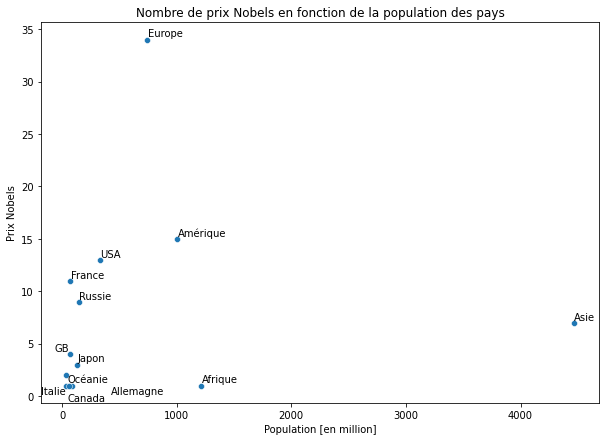

In [115]:
# Importation des packages nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Initialisation de la taille de la figure, dessin des points, labellisation des axes, et ajout d'un titre
plt.figure(figsize=(10,7))
sns.scatterplot(x='Population', y='Mathématiques', data=data_nobel)
plt.xlabel('Population [en million]')
plt.ylabel('Prix Nobels')
plt.title('Nombre de prix Nobels en fonction de la population des pays')

#Code repris de mon TP1 et TP2
#J'ajoute les étiquettes 'Pays ou région' sur chaque point
libelles = []
for i in range(len(data_nobel)):
      libelles.append(plt.annotate(data_nobel.index[i], (data_nobel['Population'][i], data_nobel['Mathématiques'][i])))
adjust_text(libelles)

plt.show()

10. Calculer et afficher le vecteur des moyennes de toutes les colonnes du jeu de données. Utiliser la librarie `numpy`. (1 point)

In [69]:
# Je choisis de faire la moyenne par colonne
mean_vec = np.mean(data_nobel, axis=0)
mean_vec

Chimie            22.461538
Economie          10.384615
Littérature       12.384615
Médecine          26.692308
Paix              11.615385
Physique          26.538462
Mathématiques      7.846154
Population       644.191308
dtype: float64

11. Calculer et afficher le vecteur des écart-types de toutes les colonnes du jeu de données. Utiliser la librarie `numpy`. (1 point)

In [70]:
# Je choisis de fair le calcul des écarts-type par colonne
std_vec = np.std(data_nobel, axis=0)
std_vec

Chimie             27.105536
Economie           16.174712
Littérature        19.734930
Médecine           34.147609
Paix               13.618644
Physique           30.880951
Mathématiques       8.917107
Population       1167.603484
dtype: float64

12. Calculer la matrice des données centrées-réduites et stocker la dans un objet nommé `X`. Vous pouvez soit utiliser les moyennes et écart-types calculés aux questions 10 et 11, soit utiliser une fonction de la librairie `sklearn` que nous avons vue en cours (auquel cas vous pouvez vérifier les valeurs trouvées aux deux questions précédentes.) Il est bon de noter que les fonctions `DataFrame` et `to_markdown` de la librairie `pandas` vous permettent d'obtenir un affichage plus joli (ce n'est pas exigé). (1 point)

In [83]:
#En utilisant d'abord la librairie sklearn, j'importe la librairie et j'applique la transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Je standardise
X = scaler.fit_transform(data_nobel)
# Puis je transforme en dataframe avec les index et colonnes utilisés prédécemment
X = pd.DataFrame(data=X_correct,index=data_nobel.index,columns=data_nobel.columns)
X.head()

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
Pays ou région,,,,,,,,
Allemagne,0.056758,-0.580203,-0.222175,-0.254551,-0.485759,-0.082202,-0.767755,-0.480618
Canada,-0.681098,-0.456553,-0.526205,-0.664536,-0.779474,-0.729850,-0.767755,-0.519527
France,-0.533527,-0.456553,-0.070161,-0.430259,-0.118616,-0.567938,0.353685,-0.494347
GB,0.019865,-0.271078,-0.272847,-0.020274,-0.045187,-0.211731,-0.431323,-0.494638
Italie,-0.791777,-0.580203,-0.323519,-0.635251,-0.779474,-0.697468,-0.767755,-0.500025


In [84]:
# Je réalise les mêmes calculs à la main pour vérifier mes valeurs précédentes pour Q10 et Q11
my_X = data_nobel.apply(lambda row: (row-mean_vec)/std_vec, axis=1)
my_X.head()
# J'obtiens bien les mêmes résultats!

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,Population
Pays ou région,,,,,,,,
Allemagne,0.056758,-0.580203,-0.222175,-0.254551,-0.485759,-0.082202,-0.767755,-0.480618
Canada,-0.681098,-0.456553,-0.526205,-0.664536,-0.779474,-0.729850,-0.767755,-0.519527
France,-0.533527,-0.456553,-0.070161,-0.430259,-0.118616,-0.567938,0.353685,-0.494347
GB,0.019865,-0.271078,-0.272847,-0.020274,-0.045187,-0.211731,-0.431323,-0.494638
Italie,-0.791777,-0.580203,-0.323519,-0.635251,-0.779474,-0.697468,-0.767755,-0.500025


13. Utiliser les fonctions `eig` et `dot` de la librairie `numpy` pour calculer les valeurs propres et vecteurs propres de la matrice des corrélations $(X^TX)/n$ où $n$ est le nombre de pays/régions et $X$ est la matrice des données centrées-réduites obtenue à la question précédente. De manière équivalente, vous pouvez utiliser la fonction `corrcoef` de la librairie `numpy` directement sur `data_nobel.T`. (C'est ainsi une façon de vérifier vos résultats, ou bien d'être en mesure de faire cette question même si vous n'avez pas fait la question 12.) Stocker ces valeurs propres et vecteurs propres dans des objets nommés `values` et `vectors`. Afficher la valeur de $\lambda_1$, la plus grande valeur propre (vous devriez trouver une valeur très proche de 6). (1 point)

In [99]:
#Je vérifie mes calculs qui suivent en affichant directement la vraie matrice de corrélation
corr_mat = np.corrcoef(X.T)
corr_mat

array([[ 1.00000000e+00,  7.86328724e-01,  8.46658307e-01,
         9.81150161e-01,  9.43419415e-01,  9.91103123e-01,
         8.90133633e-01,  9.05348977e-02],
       [ 7.86328724e-01,  1.00000000e+00,  4.10169812e-01,
         8.60628733e-01,  6.62074639e-01,  8.43830306e-01,
         6.35606455e-01,  1.52076943e-02],
       [ 8.46658307e-01,  4.10169812e-01,  1.00000000e+00,
         7.93718728e-01,  9.19575796e-01,  8.06967419e-01,
         9.12598158e-01,  9.85060923e-02],
       [ 9.81150161e-01,  8.60628733e-01,  7.93718728e-01,
         1.00000000e+00,  9.11321574e-01,  9.85667116e-01,
         8.73413866e-01, -8.97302114e-04],
       [ 9.43419415e-01,  6.62074639e-01,  9.19575796e-01,
         9.11321574e-01,  1.00000000e+00,  9.23627894e-01,
         9.38889861e-01,  2.68177616e-01],
       [ 9.91103123e-01,  8.43830306e-01,  8.06967419e-01,
         9.85667116e-01,  9.23627894e-01,  1.00000000e+00,
         8.87502827e-01,  8.62786328e-02],
       [ 8.90133633e-01,  6.356064

In [102]:
# Je m'aide du site : http://www.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html et du petit guide PCA
# J'importe la librairie d'algèbre linéaire
from numpy import linalg as LA

#Je calcule à la main la matrice de corrélation et je compare avec les résultats de la fonction corrcoef: j'ai la même !
n=len(data_nobel)
my_corr_mat = (np.dot(X.T, X))/n
values, vectors = LA.eig(my_corr_mat)

#Extraction et affichage de la première valeur propre, elle est bien proche de 6 !
lambda_1 = values[0]
print('La plus grande valeur propre est : {}.'.format(lambda_1))

La plus grande valeur propre est : 6.131665343911123.


14. Post-multiplier la matrice des données centrées-réduites $X$ par le premier vecteur propre $v_1$ (associé à la plus grande valeur propre $\lambda_1$) pour obtenir les coordonnées $C_1=Xv_1$ des observations après projection sur le premier axe principal. Vous noterez cet objet python `C1`. Faites de même pour le deuxième vecteur propre $v_2$ et noter l'objet résultant `C2`. Afficher le contenu de `C1`. (1 point)

In [111]:
# Extraction du premier vecteur propre v_1 et v_2
v_1 = vectors[0]
v_2 = vectors[1]
# Calcul des coordonnées C1 et C2 après projection 
C1 = np.dot(X, v_1)
C2 = np.dot(X, v_2)
print('Le premier vecteur de coordonnées après projection est :')
print(C1)

Le premier vecteur de coordonnées après projection est :
[-0.82089207 -1.02071171  0.06457515 -0.37194436 -0.94260279 -0.84332029
 -0.344568    1.00081854 -0.81037511  1.38228061 -0.19254929  3.81256822
 -0.91327889]


15. Tracer le scatter plot de `C2` en fonction de `C1`. Ajouter sur chaque point les noms des pays et régions, et nommer l'axe horizontal "Composante 1" et l'axe vertical "Composante 2". (1 point)

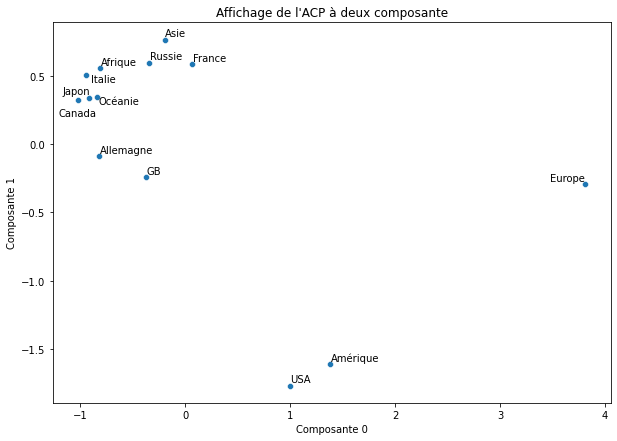

In [125]:
# Initialisation de la taille de la figure, dessin des points, labellisation des axes, et ajout d'un titre
plt.figure(figsize=(10,7))
sns.scatterplot(x=C1, y=C2)
plt.xlabel('Composante 0')
plt.ylabel('Composante 1')
plt.title('Affichage de l\'ACP à deux composante')

#Code repris de mon TP1 et TP2
#J'ajoute les étiquettes 'Pays ou région' sur chaque point
libelles = []
for i in range(len(data_nobel)):
      libelles.append(plt.annotate(data_nobel.index[i], (C1[i], C2[i])))
adjust_text(libelles)

plt.show()

16. Faire la même chose qu'aux questions 13, 14 et 15 en utilisant la fonction `PCA` de la librairie `sklearn` comme on l'a vu en TP. Vous pouvez agrémenter le graphique que vous afficherez d'une belle légende avec la taille des points qui dépendra de la taille de la population. Il est bon de noter qu'un vecteur propre est défini au signe près. Ainsi, il est possible que le graphique obtenu ici soit en miroir pour l'un ou l'autre (ou les deux) des axes par rapport à celui que vous avez obtenu à la question 15. (1 point)

In [129]:
# La fonction adjust_text, vue en TP, permet d'éviter des chevauchements de noms sur le graphique
# !pip install adjustText 
# from adjustText import adjust_text
# Déja fait plus haut !

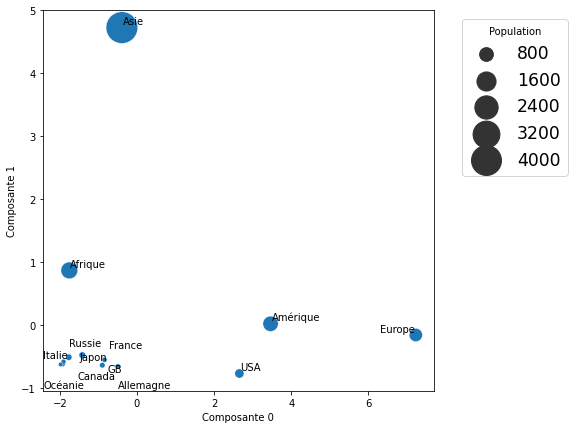

In [130]:
# Importation de la librairie pour la PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

data_pca = scaler.fit_transform(data_nobel)
data_pca = pca.fit_transform(data_pca)

data_nobel['Composante 0'] = data_pca[:,0]
data_nobel['Composante 1'] = data_pca[:,1]


plt.figure(figsize=(7,7))
sns.scatterplot(x='Composante 0', y='Composante 1', data=data_nobel, size='Population', sizes=(20,1000))
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')

libelles = []
for i in range(len(data_nobel)):
      libelles.append(plt.annotate(data_nobel.index[i], (data_nobel['Composante 0'][i], data_nobel['Composante 1'][i])))
adjust_text(libelles)

plt.show()

17. Calculer les scores individuels (de qualité de l'ACP) de tous les pays et régions et afficher les dans une belle table dont les lignes seront ordonnées par `scores` croissant et qui contiendra, dans cet ordre, les quatre variables: "Composante1", "Composante2", "Population" et "scores". L'index fera apparaître clairement les noms des `Pays ou région`. Interpréter. (1 point)

In [139]:
data_score


,Composante 0,Composante 1,Population,Scores
Pays ou région,,,,
Allemagne,-0.896886,-0.640313,83.020,-2.044217
Canada,-1.917380,-0.624581,37.590,-2.225772
France,-0.840110,-0.553174,66.990,-2.014283
GB,-0.491057,-0.659374,66.650,-2.013335
Italie,-1.902509,-0.584817,60.360,-2.211204
Japon,-1.766028,-0.512757,126.500,-2.160861
Russie,-1.416049,-0.480499,144.500,-2.081458
USA,2.656302,-0.772021,328.200,-2.491339
Afrique,-1.752916,0.867500,1216.000,-2.268725


In [141]:
# Je supprime les colonnes que je ne veux pas, et met dans le bon ordre les colonnes à conserver
domaines = ['Chimie','Economie','Littérature'	,'Médecine',	'Paix',	'Physique',	'Mathématiques', 'Population']
data_score = data_nobel.drop(columns=domaines, axis=1)
data_score['Population'] = data_nobel['Population']
#Je reconstruis les données et calcule les scores
reconstruction = pca.inverse_transform(data_pca)
data_score['Scores'] = pca.score_samples(reconstruction)
#Je trie le tableau suivant les scores croissants
data_score = data_score.sort_values(by='Scores')
data_score.head()

,Composante 0,Composante 1,Population,Scores
Pays ou région,,,,
Asie,-0.389850,4.728255,4463.0,-6.970599
Europe,7.228999,-0.159327,741.4,-5.290604
Amérique,3.463760,0.019151,1002.0,-2.676633
USA,2.656302,-0.772021,328.2,-2.491339
Afrique,-1.752916,0.867500,1216.0,-2.268725


18. Faire un graphique du pourcentage de variance expliquée cumulée. Que constatez-vous? (1 point)

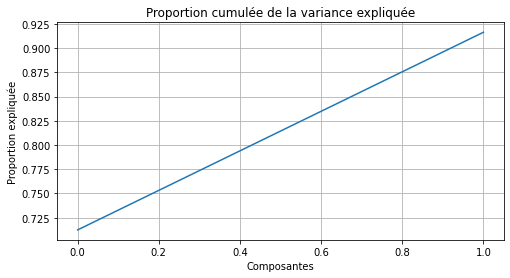

In [145]:
# Production du graphique de variance cumulée
plt.figure(figsize=(8,4))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Proportion cumulée de la variance expliquée')
plt.xlabel('Composantes')
plt.ylabel('Proportion expliquée')
plt.grid() 
#On remarque que la variance cumulée est linéaire ! 
#Cela siginfie que chaque composnte contient autant d'information, les première n'en ont pas plus que les autres

19. Calculer la corrélation entre la composante 1 et chacune des 8 variables du jeu de données `data_nobel`. Faites de même pour la deuxième composante. Afficher ces valeurs de corrélation dans une table de dimension $8\times2$ faisant clairement apparaître les noms des pays ou régions en ligne, et les noms "Composante1" et "Composante2" pour les deux colonnes. (1 point)

In [ ]:
# VOTRE CODE ICI

20. Servez-vous de ces résultats pour interpréter les deux axes du nuage de points de la question 15 (ou 16). (1 point)

**Interprétation:**
...